### Arkham Tourism Predictor

In [1]:

import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [2]:
data = pd.read_csv("data_2014_2017_prepared.csv")

In [3]:
data.columns

Index(['year', 'quarter', 'market', 'dur_stay', 'mode', 'purpose',
       'Visits (000s)', 'Spend (£m)'],
      dtype='object')

In [4]:
data.dtypes

year               int64
quarter            int64
market             int64
dur_stay           int64
mode               int64
purpose            int64
Visits (000s)    float64
Spend (£m)       float64
dtype: object

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17243 entries, 0 to 17242
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           17243 non-null  int64  
 1   quarter        17243 non-null  int64  
 2   market         17243 non-null  int64  
 3   dur_stay       17243 non-null  int64  
 4   mode           17243 non-null  int64  
 5   purpose        17243 non-null  int64  
 6   Visits (000s)  17243 non-null  float64
 7   Spend (£m)     17243 non-null  float64
dtypes: float64(2), int64(6)
memory usage: 1.1 MB


### Dealing with the missing value

<AxesSubplot:>

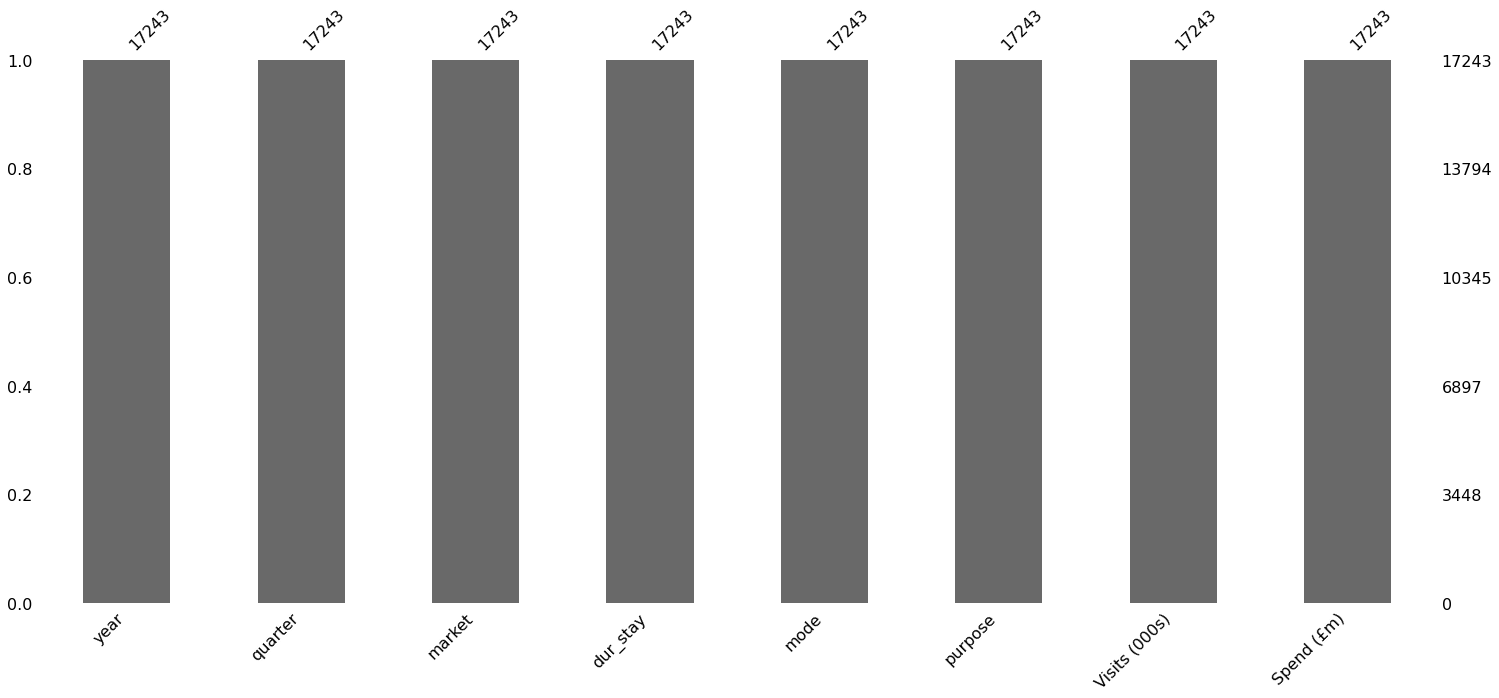

In [20]:
import missingno as msno


msno.bar(data)

#no missing data

### Correlation matrix

<AxesSubplot:>

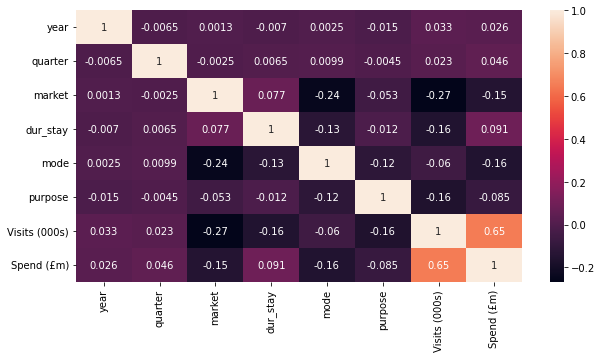

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = data.corr()
plt.figure(figsize = (10, 5))
sns.heatmap(corr,  annot = True)


In [5]:
X = data.copy()
y = X.pop("Visits (000s)")

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [7]:
X_train = X_train.dropna()

X_test = X_test.dropna()

In [18]:
X_test.head(1)

,year,quarter,market,dur_stay,mode,purpose,Spend (£m)
15377,2017,3,10,3,3,1,0.04902


In [8]:
model = xgb.XGBRegressor(
                    max_depth=10,
                    learning_rate=0.1,
                    gamma=0.0,
                    min_child_weight=0.0,
                    max_delta_step=0.0,
                    subsample=1.0,
                    colsample_bytree=0.75,
                    colsample_bylevel=1.0,
                    reg_alpha=0.0,
                    reg_lambda=1.0,
                    n_estimators=300,
                    silent=0,
                    nthread=4,
                    scale_pos_weight=1.0,
                    base_score=0.5,
                    seed=1337,
                    missing=1,
                  )


In [9]:
model.fit(X_train, y_train)

[20:13:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1.0,
             colsample_bynode=1, colsample_bytree=0.75, gamma=0.0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0.0, max_depth=10,
             min_child_weight=0.0, missing=1, monotone_constraints='()',
             n_estimators=300, n_jobs=4, nthread=4, num_parallel_tree=1,
             random_state=1337, reg_alpha=0.0, reg_lambda=1.0,
             scale_pos_weight=1.0, seed=1337, silent=0, subsample=1.0,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [11]:

predictions = model.predict(X_test)


In [12]:
model.score(X_test, y_test)

0.9140101528176434

In [13]:
predictions = pd.Series(data= predictions, index=X_test.index, name='predicted_value')

predictions = round(predictions * 1000)

In [14]:
import pickle as pkl

In [16]:
pkl.dump(model, open("model.pkl", "wb"))